In [1]:
import json
import pandas as pd
import re

%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%pylab inline
pd.set_option('display.mpl_style', 'default') 

Populating the interactive namespace from numpy and matplotlib


In [3]:
raw_data = 'fashion_brands.txt'

In [4]:
tweets_data = []

In [5]:
tweets_file = open(raw_data, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
print(len(tweets_data))

4555


In [6]:
type(tweets_data)

list

In [8]:
tweet_df = pd.DataFrame(tweets_data, columns=["created_at", "lang", "text"]).set_index("created_at")  

In [9]:
tweet_df.head()

,lang,text
created_at,,
Sun Nov 29 00:55:39 +0000 2015,en,Six pairs of socks for $3 @OldNavy (40% discou...
Sun Nov 29 00:55:41 +0000 2015,in,@KSGian_KaJenian @ksgkicutiepie kaisi galat fe...
Sun Nov 29 00:55:52 +0000 2015,pt,RT @esquecimedisto: Eu adoro os lenços d zara ...
Sun Nov 29 00:56:02 +0000 2015,en,Hensem https://t.co/X23ne5SPKi
Sun Nov 29 00:56:09 +0000 2015,en,Weekend binges include some goodies from @Fore...


### Change the name of the Columns

In [10]:
tweet_df = tweet_df.rename(columns = {
    'lang':'language',
    'text':'tweet',
})


In [11]:
tweet_df.tail()

,language,tweet
created_at,,
Sun Nov 29 07:52:10 +0000 2015,en,https://t.co/0behT2AKwZ ZARA BNWT Raincoat Wit...
Sun Nov 29 07:52:26 +0000 2015,hi,^._.Nadaani Ki Hadd Hain Zara Dekho To Ussay._...
Sun Nov 29 07:52:32 +0000 2015,ja,RT @yabebu: BI FINAL ツアーTシャツ \nZARA ブレザー\nBP フ...
Sun Nov 29 07:52:33 +0000 2015,ja,ZARAでお買い物💸💸😂😂
Sun Nov 29 07:53:03 +0000 2015,in,RT @chauhdrii_saab: Zara sa has k jo dekha tu ...


In [12]:
tweet_df.tail()

,language,tweet
created_at,,
Sun Nov 29 07:52:10 +0000 2015,en,https://t.co/0behT2AKwZ ZARA BNWT Raincoat Wit...
Sun Nov 29 07:52:26 +0000 2015,hi,^._.Nadaani Ki Hadd Hain Zara Dekho To Ussay._...
Sun Nov 29 07:52:32 +0000 2015,ja,RT @yabebu: BI FINAL ツアーTシャツ \nZARA ブレザー\nBP フ...
Sun Nov 29 07:52:33 +0000 2015,ja,ZARAでお買い物💸💸😂😂
Sun Nov 29 07:53:03 +0000 2015,in,RT @chauhdrii_saab: Zara sa has k jo dekha tu ...


In [13]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4555 entries, Sun Nov 29 00:55:39 +0000 2015 to Sun Nov 29 07:53:03 +0000 2015
Data columns (total 2 columns):
language    4555 non-null object
tweet       4555 non-null object
dtypes: object(2)
memory usage: 106.8+ KB


### Let Our Analysis Begin

In [50]:
%%html
<iframe src="//giphy.com/embed/VVgRNcBKp64NO?html5=true" width="480" height="199" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="http://giphy.com/gifs/neil-degrasse-tyson-VVgRNcBKp64NO">via GIPHY</a></p>

In [14]:
def word_in_text(word, tweet):
    word = word.lower()
    tweet = tweet.lower()
    match = re.search(word, tweet)
    if match:
        return True
    return False

In [16]:
tweet_df['oldnavy'] = tweet_df['tweet'].apply(lambda tweet: word_in_text('oldnavy', tweet))
tweet_df['forever21'] = tweet_df['tweet'].apply(lambda tweet: word_in_text('forever21', tweet))
tweet_df['zara'] = tweet_df['tweet'].apply(lambda tweet: word_in_text('zara', tweet))

In [11]:
tweet_df.head()

,lang,text,oldnavy,forever21,zara
created_at,,,,,
Sun Nov 29 00:55:39 +0000 2015,en,Six pairs of socks for $3 @OldNavy (40% discou...,True,False,False
Sun Nov 29 00:55:41 +0000 2015,in,@KSGian_KaJenian @ksgkicutiepie kaisi galat fe...,False,False,True
Sun Nov 29 00:55:52 +0000 2015,pt,RT @esquecimedisto: Eu adoro os lenços d zara ...,False,False,True
Sun Nov 29 00:56:02 +0000 2015,en,Hensem https://t.co/X23ne5SPKi,False,False,False
Sun Nov 29 00:56:09 +0000 2015,en,Weekend binges include some goodies from @Fore...,False,True,False


In [64]:
oldnavy = tweet_df['oldnavy'].value_counts()[True]
forever21 = tweet_df['forever21'].value_counts()[True]
zara = tweet_df['zara'].value_counts()[True]


print('Old Navy mentions:',oldnavy)
print('Forever21 mentions:', forever21)
print('Zara mentions:', zara)

Old Navy mentions: 150
Forever21 mentions: 347
Zara mentions: 3909


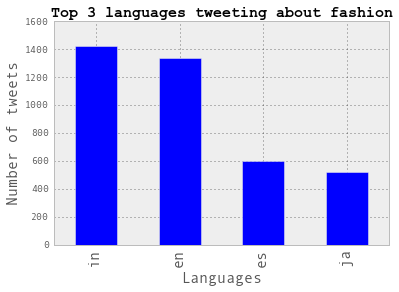

In [49]:
#Top 3 languages tweeting about fashion
language = tweet_df['language'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 3 languages tweeting about fashion', fontsize=15, fontweight='bold')
language[:4].plot(ax=ax, kind='bar', color='blue')

### Share your data with your colleague or friend

In [15]:
tweet_df.to_csv('twitter_fashion.csv')